### Step 1: Importing the necessary libraries

In [1]:
#Importing the necessary libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from IPython import display

### Step 2: Plotting the histograms

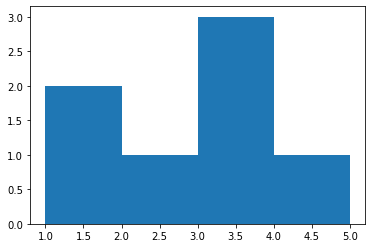

In [2]:
#use pyplot to plot the histogram
values = [1, 1.5, 2.2, 3.5, 3.5, 3.6, 4.1]
plt.hist(values, bins=4, range= (1,5))
plt.show()

### Step 3: Plotting weighted histograms

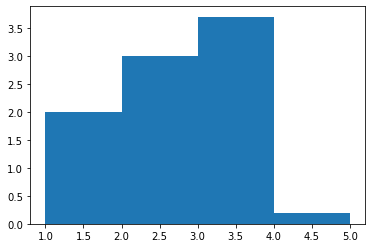

In [3]:
#plot the weighted histograms
weights = [1., 1., 3., 1.2, 1.4, 1.1, 0.2]
plt.hist(values, bins=4, range= (1,5), weights=weights)
plt.show()

### Step 4: Preparing an array to demonstrate HoG

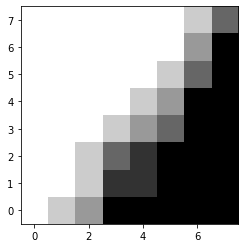

In [4]:
#prepare the image to demonstrate HOG
cell = np.array([
    [0, 1, 2, 5, 5, 5, 5, 5],
    [0, 0, 1, 4, 4, 5, 5, 5],
    [0, 0, 1, 3, 4, 5, 5, 5],
    [0, 0, 0, 1, 2, 3, 5, 5],
    [0, 0, 0, 0, 1, 2, 5, 5],
    [0, 0, 0, 0, 0, 1, 3, 5],
    [0, 0, 0, 0, 0, 0, 2, 5],
    [0, 0, 0, 0, 0, 0, 1, 3],
    ],dtype='float64')

plt.imshow(cell, cmap = 'binary', origin = 'lower')
plt.show()

### Step 5: Calculating Histograms of Oriented Gradients (HOG)

In [5]:
#calculate the histograms of oriented gradients
gradx = cv2.Sobel(cell, ddepth= cv2.CV_64F, dx=1,dy=0, ksize=1)
grady = cv2.Sobel(cell, ddepth= cv2.CV_64F, dx=0,dy=1, ksize=1)

norm, angle = cv2.cartToPolar(gradx,grady,angleInDegrees=True)

### Step 6: Plotting the norm and showing the magnitude

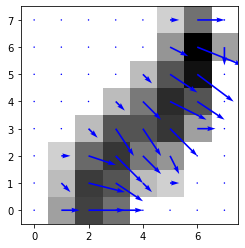

In [6]:
#plotting the norm and showing the magnitude
plt.imshow(norm, cmap = 'binary', origin = 'lower')
q = plt.quiver(gradx, grady, color='blue')
plt.show()

### Step 7: Plotting HOG using pyplot

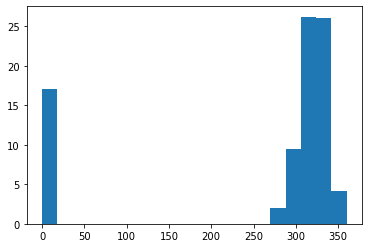

In [7]:
#Plot HOG values using pyplot
plt.hist(angle.reshape(-1), bins=20, range= (0,360), weights=norm.reshape(-1))
plt.show()

### Step 8: Loading detector

In [8]:
#load the HOG based human detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

### Step 9: Loading the video and reading the frame

In [11]:
#load the video from given path and read a frame using cv
videoPath = './video.mp4'
cap = cv2.VideoCapture(videoPath)

ret = True
ret, frame = cap.read()

### Step 10: Detecting the pedestrian

In [12]:
#detect the pedestrian 
frame = cv2.resize(frame, (640, 480))

gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

boxes, weights = hog.detectMultiScale(gray, winStride=(8,8))

### Step 11: Labelling and visualizing the image with detected boxes

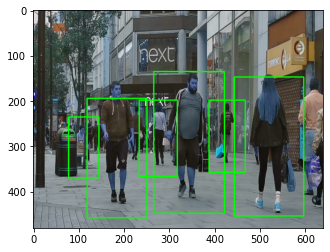

In [13]:
#draw the boxes on the image and visualize it
boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

for (xA, yA, xB, yB) in boxes:
    # display the detected boxes in the colour picture
    cv2.rectangle(frame, (xA, yA), (xB, yB),(0, 255, 0), 2)
frame = Image.fromarray(frame)
plt.imshow(frame)

### Step 12: Looping over previous steps

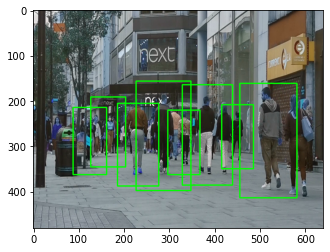

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


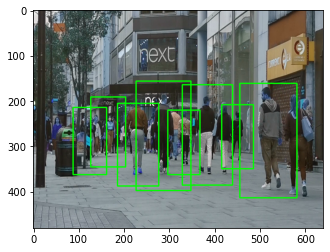

In [19]:
#examine the whole video for pedestrians
while(ret):
    
    ret, frame = cap.read()
    frame = cv2.resize(frame, (640,480))
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    boxes, wieghts = hog.detectMultiScale(gray, winStride = (10,10), scale = 1.1)
    
    boxes = np.array([[x, y, x+w, y+h] for (x, y, w, h) in boxes])
    
    for (xA, yA, xB, yB) in boxes:
        cv2.rectangle(frame, (xA, yA) , (xB,yB), (0, 255, 0), 2)
        
    frame = Image.fromarray(frame)
    plt.imshow(frame) 
    display.clear_output(wait = True)
    display.display(plt.gcf())
    
cap.release()
    
    